In [2]:
import pandas as pd
import glob

# Read all CSV files in the genre folder
genre_files = glob.glob("1_movies_per_genre/*.csv")

all_movies = []
for file in genre_files:
    df = pd.read_csv(file)
    df['genre_source'] = file.split("/")[-1].replace(".csv", "")  
    all_movies.append(df)
    
movies_df = pd.concat(all_movies, ignore_index=True)
print(movies_df.shape)
movies_df.head()

(1700, 11)


,name,year,movie_rated,run_length,genres,release_date,rating,num_raters,num_reviews,review_url,genre_source
0,The Dark Knight,2008,PG-13,2h 32min,Action; Crime; Drama;,18 July 2008 (USA),9.0,2224522,6836,https://www.imdb.com/title/tt0468569/reviews/_...,1_movies_per_genre\Action
1,Inception,2010,PG-13,2h 28min,Action; Adventure; Sci-Fi;,16 July 2010 (USA),8.8,1981675,3820,https://www.imdb.com/title/tt1375666/reviews/_...,1_movies_per_genre\Action
2,The Matrix,1999,R,2h 16min,Action; Sci-Fi;,31 March 1999 (USA),8.7,1619761,4281,https://www.imdb.com/title/tt0133093/reviews/_...,1_movies_per_genre\Action
3,The Lord of the Rings: The Fellowship of the Ring,2001,PG-13,2h 58min,Action; Adventure; Drama;,19 December 2001 (USA),8.8,1609165,5365,https://www.imdb.com/title/tt0120737/reviews/_...,1_movies_per_genre\Action
4,The Dark Knight Rises,2012,PG-13,2h 44min,Action; Adventure;,20 July 2012 (USA),8.4,1470329,2979,https://www.imdb.com/title/tt1345836/reviews/_...,1_movies_per_genre\Action


In [3]:
movies_df = movies_df.drop(columns=['movie_rated', 'release_date', 'review_url', 'genre_source'], errors='ignore')
movies_df = movies_df.rename(columns={
    'rating': 'imdb_rating'
})

movies_df.head()

,name,year,run_length,genres,imdb_rating,num_raters,num_reviews
0,The Dark Knight,2008,2h 32min,Action; Crime; Drama;,9.0,2224522,6836
1,Inception,2010,2h 28min,Action; Adventure; Sci-Fi;,8.8,1981675,3820
2,The Matrix,1999,2h 16min,Action; Sci-Fi;,8.7,1619761,4281
3,The Lord of the Rings: The Fellowship of the Ring,2001,2h 58min,Action; Adventure; Drama;,8.8,1609165,5365
4,The Dark Knight Rises,2012,2h 44min,Action; Adventure;,8.4,1470329,2979


In [4]:
review_files = glob.glob("2_reviews_per_movie_raw/*.csv")

reviews = []
for file in review_files:
    df = pd.read_csv(file)
    df['movie_name'] = file.split("/")[-1].replace(".csv", "")
    reviews.append(df)
    
reviews_df = pd.concat(reviews, ignore_index=True)
print(reviews_df.shape)
reviews_df.head()

(795299, 8)


,username,rating,helpful,total,date,title,review,movie_name
0,Imme-van-Gorp,7,102,123,30 January 2019,Unfortunately the ending ruined an otherwise ...,This movie is full of suspense. It makes you g...,2_reviews_per_movie_raw\10 Cloverfield Lane 2016
1,sonofocelot-1,5,385,500,10 May 2016,...oh dear Abrams. Again.\n,I'll leave this review fairly concise. <br/><b...,2_reviews_per_movie_raw\10 Cloverfield Lane 2016
2,mhodaee,5,110,143,4 August 2017,"Fantastic, gripping, thoroughly enjoyable, un...",I give the 5/10 out of the credit I owe to the...,2_reviews_per_movie_raw\10 Cloverfield Lane 2016
3,fil-nik09,5,73,100,5 October 2016,Hmmm...\n,"First of all, I must say that I was expecting ...",2_reviews_per_movie_raw\10 Cloverfield Lane 2016
4,DVR_Brale,7,42,56,27 July 2016,Slow building & plot alternating claustrophob...,I've always loved movies with strong atmospher...,2_reviews_per_movie_raw\10 Cloverfield Lane 2016


In [5]:
reviews_df = reviews_df.drop(columns=['date'], errors='ignore')
reviews_df = reviews_df.rename(columns={
    'rating': 'user_rating',
    'title': 'review_title'
})
import os
# Update the 'movie_name' column to remove the path
reviews_df['movie_name'] = reviews_df['movie_name'].apply(lambda x: os.path.splitext(os.path.basename(x))[0])

import re
# Remove the year (4 digits at the end) and strip trailing spaces
reviews_df['movie_name_clean'] = reviews_df['movie_name'].apply(lambda x: re.sub(r'\s+\d{4}$', '', x).strip())

# lowercase for consistent matching
reviews_df['movie_name_clean'] = reviews_df['movie_name_clean'].str.lower().str.strip()
reviews_df = reviews_df.drop(columns=['movie_name'], errors='ignore')
reviews_df.head()

,username,user_rating,helpful,total,review_title,review,movie_name_clean
0,Imme-van-Gorp,7,102,123,Unfortunately the ending ruined an otherwise ...,This movie is full of suspense. It makes you g...,10 cloverfield lane
1,sonofocelot-1,5,385,500,...oh dear Abrams. Again.\n,I'll leave this review fairly concise. <br/><b...,10 cloverfield lane
2,mhodaee,5,110,143,"Fantastic, gripping, thoroughly enjoyable, un...",I give the 5/10 out of the credit I owe to the...,10 cloverfield lane
3,fil-nik09,5,73,100,Hmmm...\n,"First of all, I must say that I was expecting ...",10 cloverfield lane
4,DVR_Brale,7,42,56,Slow building & plot alternating claustrophob...,I've always loved movies with strong atmospher...,10 cloverfield lane


In [6]:
# Step 1: Read the descriptions from netflix_titles
descriptions_df = pd.read_csv('C:\\Users\\Hp\\Desktop\\netflix_titles.csv')
# Step 2: Clean the movie title in descriptions_df
descriptions_df['title_clean'] = descriptions_df['title'].str.strip().str.lower()
# Step 3: Clean the name in movies_df to match
movies_df['name_clean'] = movies_df['name'].str.strip().str.lower()
# Step 4: Merge on the cleaned titles
movies_df = pd.merge(movies_df, descriptions_df[['title_clean', 'description']], 
                     left_on='name_clean', right_on='title_clean', how='left')
# Step 5: Drop the extra 'title_clean' column
movies_df.drop(columns=['title_clean'], inplace=True)
movies_df.shape

C:\Users\Hp\AppData\Local\Temp\ipykernel_7192\1660642918.py:2: DtypeWarning: Columns (0,1,2,3,4,5,6,8,9,10,11,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  descriptions_df = pd.read_csv('C:\\Users\\Hp\\Desktop\\netflix_titles.csv')


(1700, 9)

In [7]:
# Step 1: Read the overview from movies_metadata of tmdb
overview_df = pd.read_csv('C:\\Users\\Hp\\Desktop\\movies_metadata\\movies_metadata.csv')
# Step 2: Clean the movie title in overview_df
overview_df['title_clean'] = overview_df['original_title'].str.strip().str.lower()
# Step 3: Merge on the cleaned titles
movies_df = pd.merge(movies_df, overview_df[['title_clean', 'overview']], 
                     left_on='name_clean', right_on='title_clean', how='left')
# Step 5: Drop the extra 'title_clean' column
movies_df.drop(columns=['title_clean'], inplace=True)

C:\Users\Hp\AppData\Local\Temp\ipykernel_7192\1101845733.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  overview_df = pd.read_csv('C:\\Users\\Hp\\Desktop\\movies_metadata\\movies_metadata.csv')


In [8]:
import pandas as pd

# Step 1: Fill NaN values in 'overview' with values from 'description'
movies_df['overview'] = movies_df['overview'].fillna(movies_df['description'])
# Step 2: Drop the 'description' column
movies_df = movies_df.drop(columns=['description'])
# Step 3: Rename 'overview' column to 'description'
movies_df = movies_df.rename(columns={'overview': 'description'})
# check how many missing descriptions are still there
missing_descriptions = movies_df['description'].isna().sum()
print(f"Missing descriptions remaining: {missing_descriptions}")
movies_df.shape

Missing descriptions remaining: 155


(1984, 9)

In [9]:
# Step 1: Drop duplicates based on name_clean and description
movies_df = movies_df.drop_duplicates(subset=['name_clean', 'description'])

# Step 2: Sort by length of description, longest first
movies_df['desc_len'] = movies_df['description'].apply(lambda x: len(str(x)))

# Step 3: Drop duplicates based on movie name, keeping the one with longest description
movies_df_unique = movies_df.sort_values(by='desc_len', ascending=False).drop_duplicates(subset='name_clean', keep='first')

# Step 4: Drop the temporary length column
movies_df_unique = movies_df_unique.drop(columns=['desc_len'])

# Reset index
movies_df_unique = movies_df_unique.reset_index(drop=True)

movies_df_unique.head()


,name,year,run_length,genres,imdb_rating,num_raters,num_reviews,name_clean,description
0,Ben-Hur,1959,3h 32min,Adventure; Drama; History;,8.1,213444,443,ben-hur,Ben-Hur is a 1959 epic film directed by Willia...
1,No Man's Land,2001,1h 38min,Comedy; Drama; War;,7.9,43762,181,no man's land,The film starts with a story about how two mon...
2,Gladiator,2000,2h 35min,Action; Adventure; Drama;,8.5,1297718,2636,gladiator,"In the year 180, the death of emperor Marcus A..."
3,Hercules,1997,1h 33min,Animation; Adventure; Comedy;,7.3,198490,218,hercules,"Fourteen hundred years ago, a tormented soul w..."
4,The Rookie,2002,2h 7min,Drama; Sport;,6.9,31474,176,the rookie,Jim Morris never made it out of the minor leag...


In [10]:
movies_df_unique.shape

(1145, 9)

In [11]:

# lowercase for consistent matching
movies_df_unique['name_clean'] = movies_df_unique['name'].str.lower().str.strip()

# Then merge
merged_df = pd.merge(reviews_df, movies_df_unique, left_on='movie_name_clean', right_on='name_clean', how='inner')

merged_df.head()

,username,user_rating,helpful,total,review_title,review,movie_name_clean,name,year,run_length,genres,imdb_rating,num_raters,num_reviews,name_clean,description
0,Imme-van-Gorp,7,102,123,Unfortunately the ending ruined an otherwise ...,This movie is full of suspense. It makes you g...,10 cloverfield lane,10 Cloverfield Lane,2016,1h 43min,Drama; Horror; Mystery;,7.2,280919,752,10 cloverfield lane,"After a car accident, Michelle awakens to find..."
1,sonofocelot-1,5,385,500,...oh dear Abrams. Again.\n,I'll leave this review fairly concise. <br/><b...,10 cloverfield lane,10 Cloverfield Lane,2016,1h 43min,Drama; Horror; Mystery;,7.2,280919,752,10 cloverfield lane,"After a car accident, Michelle awakens to find..."
2,mhodaee,5,110,143,"Fantastic, gripping, thoroughly enjoyable, un...",I give the 5/10 out of the credit I owe to the...,10 cloverfield lane,10 Cloverfield Lane,2016,1h 43min,Drama; Horror; Mystery;,7.2,280919,752,10 cloverfield lane,"After a car accident, Michelle awakens to find..."
3,fil-nik09,5,73,100,Hmmm...\n,"First of all, I must say that I was expecting ...",10 cloverfield lane,10 Cloverfield Lane,2016,1h 43min,Drama; Horror; Mystery;,7.2,280919,752,10 cloverfield lane,"After a car accident, Michelle awakens to find..."
4,DVR_Brale,7,42,56,Slow building & plot alternating claustrophob...,I've always loved movies with strong atmospher...,10 cloverfield lane,10 Cloverfield Lane,2016,1h 43min,Drama; Horror; Mystery;,7.2,280919,752,10 cloverfield lane,"After a car accident, Michelle awakens to find..."


In [12]:
print(merged_df.shape)
merged_df.info()

(774241, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774241 entries, 0 to 774240
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   username          774241 non-null  object 
 1   user_rating       774241 non-null  object 
 2   helpful           774241 non-null  int64  
 3   total             774241 non-null  int64  
 4   review_title      774241 non-null  object 
 5   review            774241 non-null  object 
 6   movie_name_clean  774241 non-null  object 
 7   name              774241 non-null  object 
 8   year              774241 non-null  int64  
 9   run_length        774241 non-null  object 
 10  genres            774241 non-null  object 
 11  imdb_rating       774241 non-null  float64
 12  num_raters        774241 non-null  int64  
 13  num_reviews       774241 non-null  int64  
 14  name_clean        774241 non-null  object 
 15  description       693136 non-null  object 
dtypes: floa

In [13]:
merged_df = merged_df.drop(['name'], axis =1)
merged_df = merged_df.drop(['name_clean'], axis =1)

In [14]:
merged_df.duplicated().any()
merged_df = merged_df.drop_duplicates()
merged_df.shape

(774240, 14)

In [15]:
merged_df = merged_df.dropna(subset=['description'])
merged_df.shape

(693135, 14)

In [16]:
missing_rating = merged_df['user_rating'].isna().sum()
print(f"Missing rating remaining: {missing_rating}")

Missing rating remaining: 0


In [17]:
print(merged_df.isnull().sum())

username            0
user_rating         0
helpful             0
total               0
review_title        0
review              0
movie_name_clean    0
year                0
run_length          0
genres              0
imdb_rating         0
num_raters          0
num_reviews         0
description         0
dtype: int64


In [18]:
merged_df.describe(include='all')

,username,user_rating,helpful,total,review_title,review,movie_name_clean,year,run_length,genres,imdb_rating,num_raters,num_reviews,description
count,693135,693135,693135.000000,693135.000000,693135,693135,693135,693135.000000,693135,693135,693135.000000,6.931350e+05,693135.000000,693135
unique,327645,11,NaN,NaN,583209,691643,931,NaN,117,167,NaN,NaN,NaN,931
top,SnoopyStyle,10,NaN,NaN,Amazing\n,I have never seen such an amazing film since I...,joker,NaN,2h 2min,Action; Adventure; Sci-Fi;,NaN,NaN,NaN,In 1947 when the maps of India and Pakistan we...
freq,916,174204,NaN,NaN,1111,23,10046,NaN,23173,48748,NaN,NaN,NaN,10046
mean,NaN,NaN,7.050817,13.467907,NaN,NaN,NaN,2002.897599,NaN,NaN,7.533858,5.230522e+05,1498.710609,NaN
std,NaN,NaN,41.352424,63.780372,NaN,NaN,NaN,13.416659,NaN,NaN,0.801574,4.455054e+05,1638.407811,NaN
min,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,1915.000000,NaN,NaN,3.500000,1.929000e+04,102.000000,NaN
25%,NaN,NaN,0.000000,1.000000,NaN,NaN,NaN,1999.000000,NaN,NaN,7.000000,2.314960e+05,610.000000,NaN
50%,NaN,NaN,1.000000,3.000000,NaN,NaN,NaN,2005.000000,NaN,NaN,7.600000,3.924330e+05,1009.000000,NaN
75%,NaN,NaN,3.000000,7.000000,NaN,NaN,NaN,2012.000000,NaN,NaN,8.100000,6.480780e+05,1796.000000,NaN


In [28]:
columns_to_check = ['user_rating', 'imdb_rating'] 

for col in columns_to_check:
    print(f"Column: {col}")
    print(merged_df[col].unique())
    print('-' * 50)

Column: user_rating
[ 7.  5.  9.  8. 10.  6.  1.  4.  3.  2.]
--------------------------------------------------
Column: imdb_rating
[7.2 7.3 8.9 8.1 7.6 6.8 5.8 7.  8.4 6.6 7.5 5.9 7.1 8.2 7.4 8.3 6.3 7.7
 7.8 8.  5.6 6.4 8.5 6.7 6.5 6.9 7.9 5.3 6.2 6.  6.1 8.6 5.7 4.6 4.1 8.8
 5.2 8.7 5.  5.4 4.5 3.5 5.5 9.  9.2 3.8 9.3]
--------------------------------------------------


In [23]:
# After cleaning user_rating
merged_df['user_rating'] = pd.to_numeric(merged_df['user_rating'], errors='coerce')

# Count how many null (NaN) values are there in 'user_rating'
null_count = merged_df['user_rating'].isnull().sum()

print(f"Number of nulls in 'user_rating': {null_count}")

Number of nulls in 'user_rating': 78433


In [24]:
# drop rows where 'user_rating' is null
merged_df = merged_df.dropna(subset=['user_rating'])

# Reset index after dropping rows
merged_df = merged_df.reset_index(drop=True)
merged_df.shape

(614702, 14)

In [29]:
import pandas as pd
import numpy as np
import re

def transform_merged_df(df):
    # 1. Convert numeric columns where necessary
    df['helpful'] = pd.to_numeric(df['helpful'], errors='coerce')
    df['total'] = pd.to_numeric(df['total'], errors='coerce')
    df['num_raters'] = pd.to_numeric(df['num_raters'], errors='coerce')
    df['num_reviews'] = pd.to_numeric(df['num_reviews'], errors='coerce')

    # 2. Convert runtime 
    def parse_runtime(s):
        if pd.isna(s):
            return np.nan
        match = re.match(r'(?:(\d+)h)?\s*(?:(\d+)min)?', str(s))
        if match:
            hours = int(match.group(1)) if match.group(1) else 0
            minutes = int(match.group(2)) if match.group(2) else 0
            return hours * 60 + minutes
        return np.nan
    
    df['run_length'] = df['run_length'].apply(parse_runtime)

    # 3. Clean string/text columns and handle 'no description', empty strings
    text_cols = ['username', 'review_title', 'review', 'genres', 'movie_name_clean', 'description']
    for col in text_cols:
        if col in df.columns:
            df[col] = df[col].astype(str).str.strip().str.lower()
            df[col] = df[col].replace(['nan', 'null', '', 'none', 'no description', '0'], np.nan)

    # 4. Drop duplicates 
    df = df.drop_duplicates()

    return df

merged_df = transform_merged_df(merged_df)
print(merged_df.dtypes)

username             object
user_rating         float64
helpful               int64
total                 int64
review_title         object
review               object
movie_name_clean     object
year                  int64
run_length            int64
genres               object
imdb_rating         float64
num_raters            int64
num_reviews           int64
description          object
dtype: object


In [31]:
#demographic filtering 

C = merged_df['user_rating'].mean()
m = merged_df['num_raters'].quantile(0.90)

qualified = merged_df[merged_df['num_raters'] >= m].copy()

qualified['weighted_rating'] = (
    (qualified['num_raters'] / (qualified['num_raters'] + m)) * qualified['user_rating'] +
    (m / (qualified['num_raters'] + m)) * C
)

qualified.shape

(63611, 15)

In [34]:
# Group by movie, take mean user rating and first num_raters and weighted_rating
grouped_movies = qualified.groupby('movie_name_clean').agg({
    'user_rating': 'mean',           # Average user rating
    'num_raters': 'first',            # Assuming num_raters is same for same movie
    'weighted_rating': 'first'        # Take first weighted_rating
}).reset_index()

# Sort by weighted_rating descending
top_movies = grouped_movies.sort_values('weighted_rating', ascending=False).head(10)

top_movies[['movie_name_clean', 'user_rating', 'num_raters', 'weighted_rating']]

,movie_name_clean,user_rating,num_raters,weighted_rating
21,the shawshank redemption,9.309612,2258845,9.108744
14,the dark knight,8.660866,2224522,9.099532
6,inception,8.018560,1981675,9.028483
3,fight club,8.678444,1794454,8.965558
9,pulp fiction,8.653846,1767445,8.955801
4,forrest gump,8.775481,1741097,8.946104
19,the matrix,8.487134,1619761,8.899020
17,the godfather,9.073956,1558661,8.873681
15,the dark knight rises,7.664803,1470329,8.834915
8,interstellar,7.679240,1430797,8.816688


C:\Users\Hp\AppData\Local\Temp\ipykernel_7192\2937340708.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_rated, x='user_rating', y='movie_name_clean', palette='viridis')


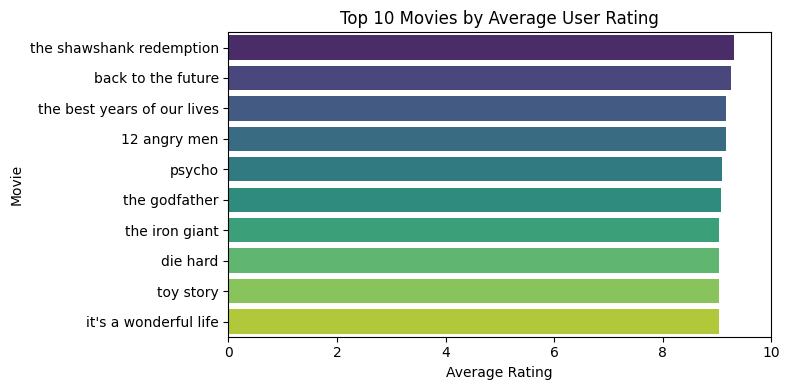

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Group by movie first
movie_ratings = merged_df.groupby('movie_name_clean').agg({
    'user_rating': 'mean'
}).reset_index()

# 2. Sort the grouped result
top_rated = movie_ratings.sort_values('user_rating', ascending=False).head(10)

# 3. Plot
plt.figure(figsize=(8,4))
sns.barplot(data=top_rated, x='user_rating', y='movie_name_clean', palette='viridis')
plt.title("Top 10 Movies by Average User Rating")
plt.xlabel("Average Rating")
plt.ylabel("Movie")
plt.xlim(0, 10)  # since ratings are between 0-10
plt.tight_layout()
plt.show()

C:\Users\Hp\AppData\Local\Temp\ipykernel_7192\3163201623.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=most_rated, x='num_raters', y='movie_name_clean', palette='magma')


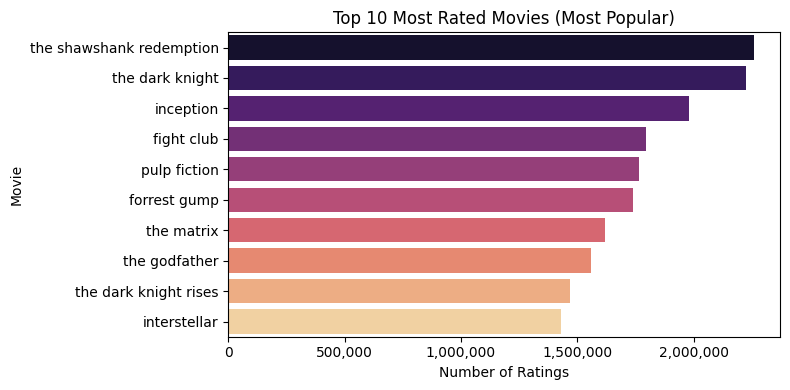

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Drop duplicate movies first
unique_movies = merged_df.drop_duplicates('movie_name_clean')

# Then sort and select top 10 by number of ratings
most_rated = unique_movies.sort_values('num_raters', ascending=False).head(10)

plt.figure(figsize=(8,4))
sns.barplot(data=most_rated, x='num_raters', y='movie_name_clean', palette='magma')
plt.title("Top 10 Most Rated Movies (Most Popular)")
plt.xlabel("Number of Ratings")
plt.ylabel("Movie")

ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.tight_layout()
plt.show()

C:\Users\Hp\AppData\Local\Temp\ipykernel_7192\1552443659.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=merged_df, x='user_rating', palette='coolwarm', order=sorted(merged_df['user_rating'].unique()))


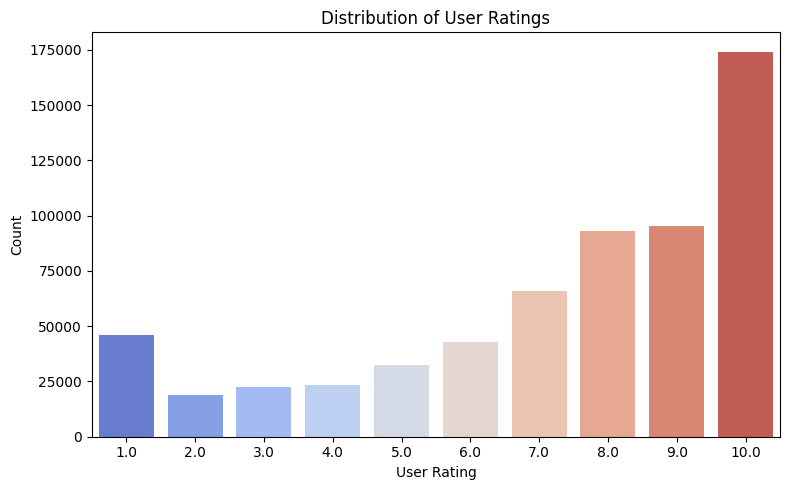

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.countplot(data=merged_df, x='user_rating', palette='coolwarm', order=sorted(merged_df['user_rating'].unique()))
plt.title("Distribution of User Ratings")
plt.xlabel("User Rating")
plt.ylabel("Count")
plt.tight_layout()
plt.show()